# Generation of the results figures

Notebook for automatic generation of the results figures to include in the final report.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import matplotlib.ticker as ticker
from functools import partial
from astropy.stats import kuiper
from shapely.geometry import LineString


## Collected Data Loading

In [2]:
data_directory=r'C:/Users/mmill/Documents/STAGE M1/Collected data/'

In [3]:
Awake_evoked=pd.read_excel(data_directory+'Awake_evoked_bks.xlsx')
Awake_spontaneous=pd.read_excel(data_directory+'Awake_spontaneous_bks.xlsx')
Anesthesia_evokedU=pd.read_excel(data_directory+'Anesthesia_evokedU_bks.xlsx')
Anesthesia_evokedD=pd.read_excel(data_directory+'Anesthesia_evokedD_bks.xlsx')
Anesthesia_spontaneous=pd.read_excel(data_directory+'Anesthesia_spontaneous_bks.xlsx')

In [4]:
Data = {'Aw Sp':Awake_spontaneous, 'Aw Ev': Awake_evoked,'An Sp':Anesthesia_spontaneous, 'An EvU':Anesthesia_evokedU, 'An EvD':Anesthesia_evokedD }

In [5]:
Keys=[k for k in Data.keys()]

In [6]:
for k in Data.keys():
    del Data[k]['Unnamed: 0']

In [7]:
Keys

['Aw Sp', 'Aw Ev', 'An Sp', 'An EvU', 'An EvD']

In [8]:
Data['Aw Sp'].head(12)

,MC #,Trial #,Type,index,Frames,Time (ms),Duration (ms),x_centroid (px),y_centroid (px),Translation,Center speed (m/s),Propagation direction (rad),Expansion,Radial speed (m/s),Surfaces (mm2),Border crossing
0,0,6,Radial,0,5,50,180,236.852459,248.338115,False,NaN,3.2552,True,-0.007739,34.849238,False
1,0,6,Radial,1,6,60,180,233.776238,228.358416,False,NaN,3.2552,True,0.012668,35.707837,False
2,0,6,Radial,2,7,70,180,236.423875,217.432526,False,NaN,3.2552,True,0.009946,40.413938,False
3,0,6,Radial,3,8,80,180,238.317460,214.691198,False,NaN,3.2552,True,-0.028505,45.999900,False
4,0,6,Radial,4,9,90,180,249.960152,214.170778,False,NaN,3.2552,True,-0.022520,36.448988,False
5,0,6,Radial,5,10,100,180,254.679039,209.897380,False,NaN,3.2552,True,0.130980,31.012875,False
6,0,6,Radial,6,11,110,180,244.766332,212.565327,False,NaN,3.2552,True,0.001641,61.385850,True
7,0,6,Radial,7,12,120,180,248.450549,189.981685,False,NaN,3.2552,True,0.045225,58.670325,True
8,0,6,Radial,8,13,130,180,253.640802,177.711421,False,NaN,3.2552,True,0.035414,83.142450,True
9,0,6,Radial,9,14,140,180,231.198309,163.231360,False,NaN,3.2552,True,NaN,93.266437,True


In [9]:
Data['Aw Ev'].tail(10)

,MC #,Trial #,Type,index,Frames,Time (ms),Duration (ms),x_centroid (px),y_centroid (px),Translation,Center speed (m/s),Propagation direction (rad),Expansion,Radial speed (m/s),Surfaces (mm2),Border crossing
114,19,13,Static,2,27,270,50,169.073593,245.826840,False,NaN,0.766105,False,NaN,16.245562,False
115,19,13,Static,3,28,280,50,176.509804,242.111111,False,NaN,0.766105,False,NaN,10.916775,False
116,19,13,Static,4,29,290,50,178.770270,259.074324,False,NaN,0.766105,False,NaN,9.660262,False
117,20,14,Radial,0,21,210,70,185.539216,240.019608,False,NaN,4.806397,True,0.007399,6.494175,False
118,20,14,Radial,1,22,220,70,173.707965,238.008850,False,NaN,4.806397,True,0.092205,7.000425,False
119,20,14,Radial,2,23,230,70,170.723636,238.160000,False,NaN,4.806397,True,0.161842,18.506475,False
120,20,14,Radial,3,24,240,70,196.001376,240.430536,False,NaN,4.806397,True,NaN,48.307387,False
121,20,14,Radial,4,25,250,70,178.841105,238.927461,False,NaN,4.806397,True,NaN,39.362962,False
122,20,14,Radial,5,26,260,70,160.746835,253.363924,False,NaN,4.806397,True,NaN,22.211212,False
123,20,14,Radial,6,27,270,70,174.131274,241.567568,False,NaN,4.806397,True,NaN,18.764663,False


## Trigger rates

In [10]:
Types = ['Static', 'Plane', 'Radial', 'Complex']
types_colors=['#7f7f7f', '#1f77b4', '#d62728', '#9467bd']
cond_colors=['gold', 'gold', 'purple', 'purple' ,'purple' ]

In [11]:
Wave_types=pd.DataFrame(data=np.zeros((5,4)), columns=Types, index=Keys)
for k in Keys:
    for i in range(Data[k]['MC #'].iloc[-1]+1):
        wave_type=Data[k]['Type'].loc[ Data[k]['MC #']==i].iloc[0]
        Wave_types.loc[k, wave_type]+=1
Wave_types.loc['An Ev']=Wave_types.loc['An EvU']+Wave_types.loc['An EvD']
Wave_types['Total'] = Wave_types.sum(axis=1)
Wave_types

,Static,Plane,Radial,Complex,Total
Aw Sp,4.0,0.0,1.0,0.0,5.0
Aw Ev,14.0,0.0,7.0,0.0,21.0
An Sp,16.0,6.0,12.0,4.0,38.0
An EvU,19.0,4.0,10.0,6.0,39.0
An EvD,18.0,4.0,18.0,7.0,47.0
An Ev,37.0,8.0,28.0,13.0,86.0


In [12]:
Total_duration=np.array([14*60/100 ,  15*60/100, 20*150/110, 20*150/110, 20*150/110, 2*20*150/110]) #s
Trigger_rate=Wave_types.div(Total_duration, axis=0)
Trigger_rate

,Static,Plane,Radial,Complex,Total
Aw Sp,0.476190,0.000000,0.119048,0.000000,0.595238
Aw Ev,1.555556,0.000000,0.777778,0.000000,2.333333
An Sp,0.586667,0.220000,0.440000,0.146667,1.393333
An EvU,0.696667,0.146667,0.366667,0.220000,1.430000
An EvD,0.660000,0.146667,0.660000,0.256667,1.723333
An Ev,0.678333,0.146667,0.513333,0.238333,1.576667


In [13]:
Good_keys = ['Aw Sp','Aw Ev', 'An Sp', 'An Ev']

### Between all data sets

In [14]:
good_cond_colors=['gold', 'gold', 'purple', 'purple']

In [15]:
merged_wave_types=Wave_types.loc[Good_keys]

In [16]:
0.1/1.4

0.07142857142857144

In [17]:
2.3/0.6

3.833333333333333

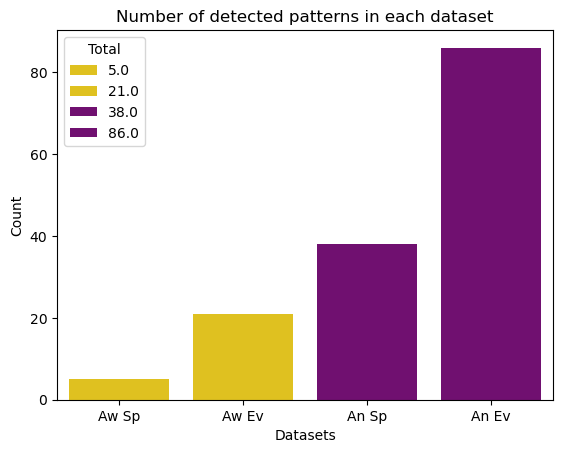

In [18]:
plt.figure()
sns.barplot(x=Good_keys, y='Total', data=merged_wave_types, hue='Total', palette=good_cond_colors)
plt.xlabel('Datasets')
plt.ylabel('Count')
plt.title('Number of detected patterns in each dataset')
plt.show()


### For each type

In [19]:
merged_trigger_rate=Trigger_rate.loc[Good_keys]

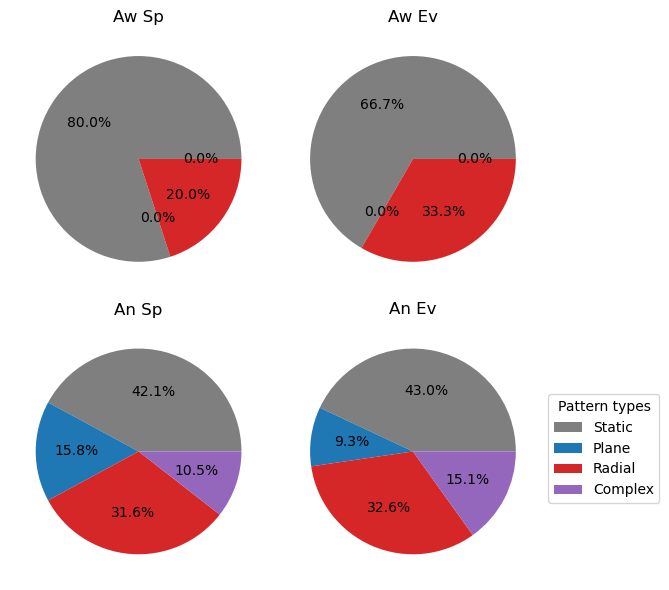

In [20]:
fig, axs = plt.subplots(2,2, figsize=(7, 6), layout='tight')

for i,k in enumerate(Good_keys):
    axs[i//2, i%2].pie(merged_wave_types.iloc[:, :4].loc[k], colors=types_colors, autopct='%1.1f%%', startangle=0)
    axs[i//2, i%2].set_title(Good_keys[i])

plt.legend(Types, title='Pattern types', bbox_to_anchor=(1, 0.75))
plt.show()

In [21]:
#fig.savefig('Pie chart')

### Both

In [22]:
merged_trigger_rate

,Static,Plane,Radial,Complex,Total
Aw Sp,0.476190,0.000000,0.119048,0.000000,0.595238
Aw Ev,1.555556,0.000000,0.777778,0.000000,2.333333
An Sp,0.586667,0.220000,0.440000,0.146667,1.393333
An Ev,0.678333,0.146667,0.513333,0.238333,1.576667


In [23]:
good_cond_colors

['gold', 'gold', 'purple', 'purple']

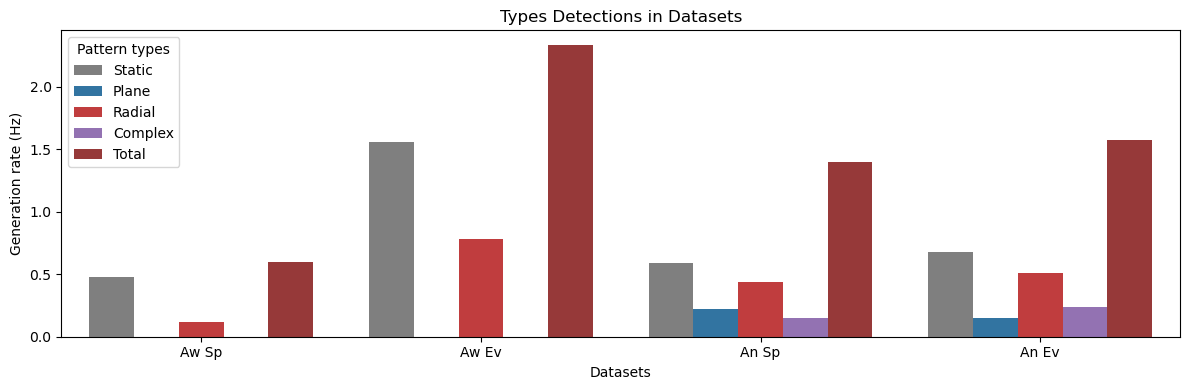

In [24]:
new_df = {'Datasets': np.concatenate([np.repeat(k, 5) for k in Good_keys]),
          'Types':(Types+['Total'])*4,
          'Detections':merged_trigger_rate.values.flatten().tolist()}

# Convert data to a pandas DataFrame
df = pd.DataFrame(new_df)

# Plot using Seaborn
plt.figure(figsize=(12, 4))
sns.barplot(x='Datasets', y='Detections', hue='Types', data=new_df, palette=types_colors+['brown'])

#sns.barplot(x=Good_keys,y='Total', data=merged_trigger_rate,hue='Total', palette=good_cond_colors)

# Customize labels and title
plt.title('Types Detections in Datasets')
plt.ylabel('Generation rate (Hz)')
plt.legend(title='Pattern types')

plt.tight_layout()
plt.show()

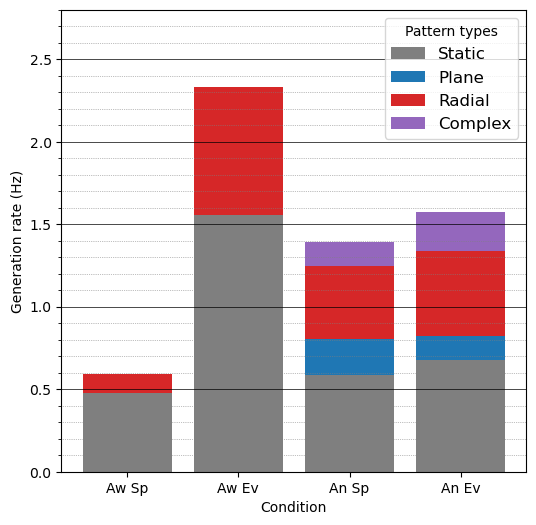

In [25]:
# Plotting
fig, ax = plt.subplots(figsize=(6, 6))

# Plot bars for Value1
ax.bar(Good_keys, merged_trigger_rate['Static'], label='Static', color=types_colors[0])

# Plot bars for Value2 stacked on top of Value1
ax.bar(Good_keys, merged_trigger_rate['Plane'], bottom=merged_trigger_rate['Static'], label='Plane', color=types_colors[1])

ax.bar(Good_keys, merged_trigger_rate['Radial'], bottom=merged_trigger_rate['Static']+merged_trigger_rate['Plane'], label='Radial', color=types_colors[2])

ax.bar(Good_keys, merged_trigger_rate['Complex'], bottom=merged_trigger_rate['Static']+merged_trigger_rate['Plane']+merged_trigger_rate['Radial'], label='Complex', color=types_colors[3])


# Customize labels and title
ax.set_xlabel('Condition')
ax.set_ylabel('Generation rate (Hz)')
ax.legend(title='Pattern types', fontsize='large')
ax.set_ylim(0,2.8)

ax.grid(axis='y', which='major', linestyle='-', linewidth='0.5', color='black')

# Enable sub-grid on the horizontal axis
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(axis='y', which='minor', linestyle=':', linewidth='0.5', color='gray')


In [26]:
#fig.savefig('Generation rate')

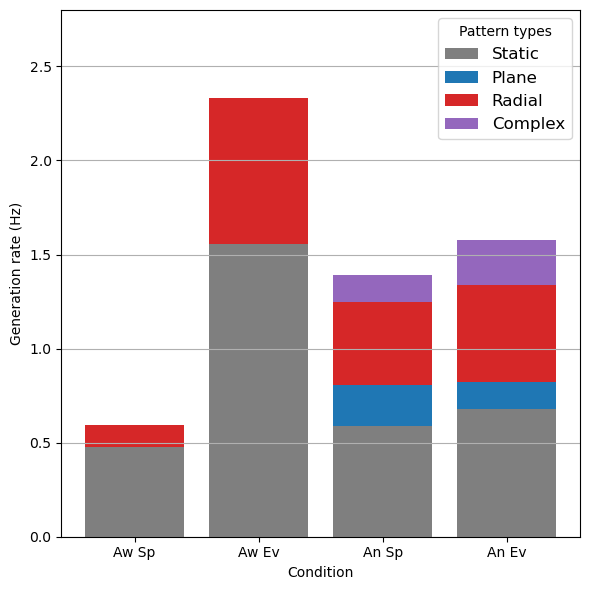

In [27]:
# Plotting
plt.figure(figsize=(6, 6))

# Plot bars for Value1
plt.bar(Good_keys, merged_trigger_rate['Static'], label='Static', color=types_colors[0])

# Plot bars for Value2 stacked on top of Value1
plt.bar(Good_keys, merged_trigger_rate['Plane'], bottom=merged_trigger_rate['Static'], label='Plane', color=types_colors[1])

plt.bar(Good_keys, merged_trigger_rate['Radial'], bottom=merged_trigger_rate['Static']+merged_trigger_rate['Plane'], label='Radial', color=types_colors[2])

plt.bar(Good_keys, merged_trigger_rate['Complex'], bottom=merged_trigger_rate['Static']+merged_trigger_rate['Plane']+merged_trigger_rate['Radial'], label='Complex', color=types_colors[3])


# Customize labels and title
plt.xlabel('Condition')
plt.ylabel('Generation rate (Hz)')
plt.legend(title='Pattern types', fontsize='large')
plt.ylim(0,2.8)
plt.tight_layout()
plt.grid(axis='y')
#plt.savefig('Wave generation rate')

plt.show()


## Wave duration

In [28]:
Wave_duration=[]
for k in Data.keys():
    condition_duration=[]
    for i in range(Data[k]['MC #'].iloc[-1]+1):
        condition_duration.append(Data[k]['Duration (ms)'].loc[Data[k]['MC #']==i].iloc[0])
    Wave_duration.append(condition_duration)

In [29]:
Aw_duration = np.concatenate((Wave_duration[0],Wave_duration[2]))
An_duration = np.concatenate((Wave_duration[1],Wave_duration[3],Wave_duration[4]))

In [30]:
len(Aw_duration), len(An_duration)

(43, 107)

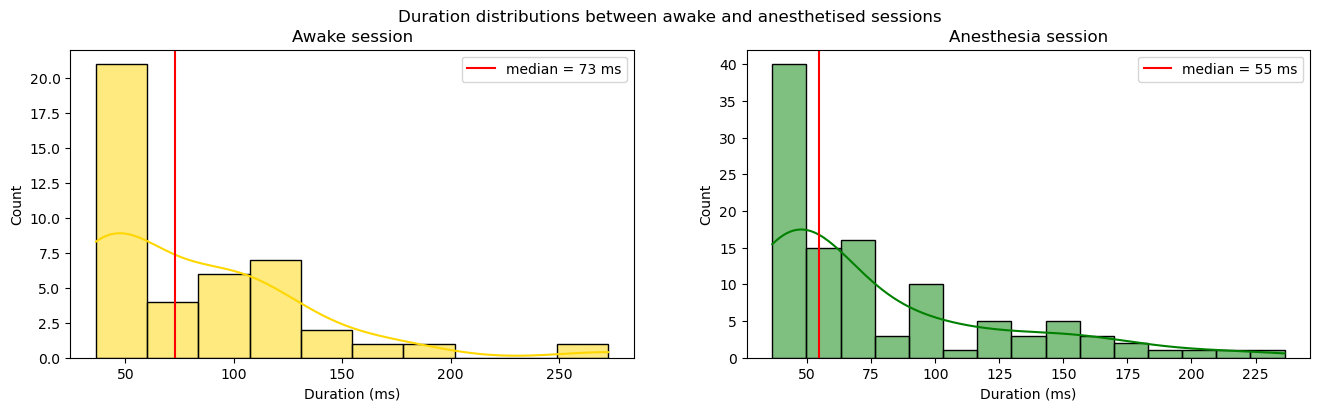

In [31]:
fig, axs = plt.subplots(1,2, figsize=(16,4))
fig.suptitle('Duration distributions between awake and anesthetised sessions')

sns.histplot(Aw_duration, bins=10, kde=True, ax=axs[0], color='gold')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Duration (ms)')
axs[0].set_title('Awake session')
axs[0].axvline(np.nanmedian(Aw_duration), color='r', label=f'median = {round(np.nanmedian(Aw_duration))} ms')
axs[0].legend()

sns.histplot(An_duration, bins=15, kde=True, ax=axs[1], color='green')
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Duration (ms)')
axs[1].set_title('Anesthesia session')
axs[1].axvline(np.nanmedian(An_duration), color='r', label=f'median = {round(np.nanmedian(An_duration))} ms')
axs[1].legend()

In [32]:
dur = pd.DataFrame({
    'value': np.concatenate([Aw_duration, An_duration]),
    'group': ['Awake']*len(Aw_duration)+['Anesthesia']*len(An_duration)
})

C:\Users\mmill\AppData\Local\Temp\ipykernel_10180\704781552.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Awake', 'Anesthesia'])


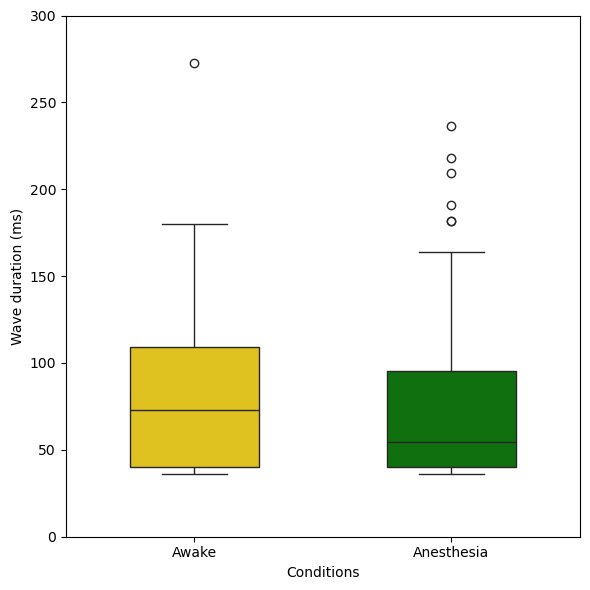

In [33]:
fig, ax = plt.subplots(figsize=(6, 6))

# Create boxplots with individual data points
sns.boxplot(data=[Aw_duration, An_duration], ax=ax, width=0.5, palette=['gold', 'green'])
#sns.stripplot(data=[Aw_duration, An_duration], ax=ax, color='black', alpha=0.5, marker='.')

# Calculate p-value (example using t-test, replace with your statistical test)
p_value = stat.mannwhitneyu(Aw_duration, An_duration)[1]

# Draw a line on top of the boxplots
line_y = np.max(np.append(Aw_duration,An_duration)) + 5  # Adjust the y position of the line

# Add significance stars
if p_value < 0.05:
    ax.plot([0, 1], [line_y, line_y], color='black', linewidth=2)
    ax.text(0.5, line_y + 0.1, "*", fontsize=12, ha='center')

# Customize plot
ax.set_xticklabels(['Awake', 'Anesthesia'])
ax.set_ylabel('Wave duration (ms)')
ax.set_xlabel('Conditions')
#ax.set_title('Pattern durations')
ax.set_ylim(0,300)
plt.tight_layout()
#fig.savefig('Duration comparison')
plt.show()

In [34]:
np.std(An_duration), np.std(Aw_duration)

(47.378472218693105, 49.61194162608107)

In [35]:
stat.mannwhitneyu(An_duration, Aw_duration, alternative='two-sided')

MannwhitneyuResult(statistic=2199.5, pvalue=0.6740989233957639)

In [36]:
stat.mannwhitneyu(An_duration, Aw_duration, alternative='greater')

MannwhitneyuResult(statistic=2199.5, pvalue=0.6644772444729153)

In [37]:
stat.ttest_ind(An_duration, Aw_duration,equal_var=True)

TtestResult(statistic=-0.5608547540035838, pvalue=0.5757446809444622, df=148.0)

In [38]:
stat.kruskal(An_duration, Aw_duration)

KruskalResult(statistic=0.17860881100761883, pvalue=0.6725715422668618)

## Wave size

In [39]:
Wave_areas=[]
for k in Data.keys():
    Wave_areas.append(Data[k]['Surfaces (mm2)'].values)

In [40]:
Aw_areas = np.concatenate((Wave_areas[0:2]))
An_areas = np.concatenate((Wave_areas[2:5]))

In [41]:
len(Aw_areas), len(An_areas)

(166, 1100)

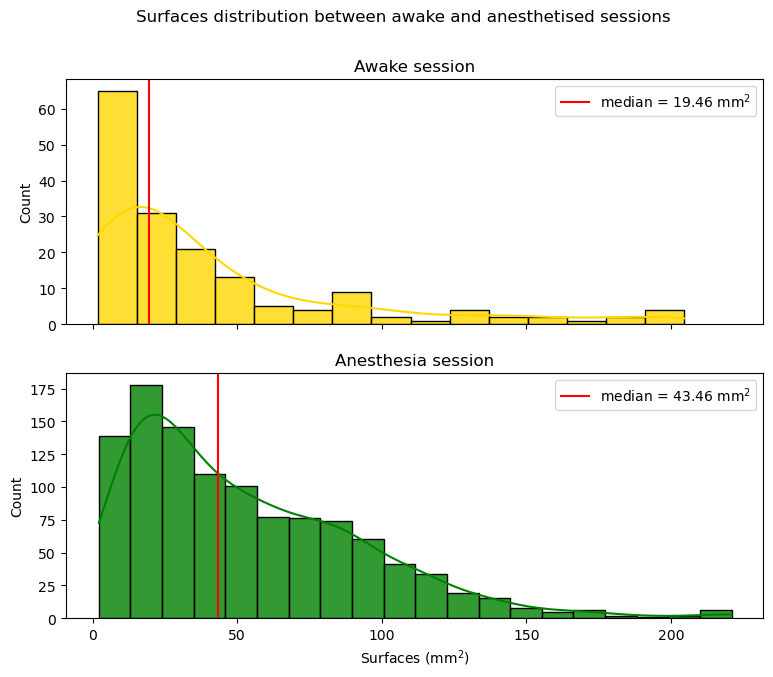

In [42]:
fig, axs = plt.subplots(2,1, figsize=(9,7), sharex=True)
fig.suptitle('Surfaces distribution between awake and anesthetised sessions')

sns.histplot(Aw_areas, bins=15, kde=True, ax=axs[0], color='gold', alpha=0.8)
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Surfaces (mm$^2$)')
axs[0].set_title('Awake session')
axs[0].axvline(np.nanmedian(Aw_areas), color='r', label=f'median = {round(np.nanmedian(Aw_areas),2)} mm$^2$')
#axs[0].axvline(np.nanmean(Aw_areas), color='gray', label=f'mean = {round(np.nanmean(Aw_areas),2)} mm$^2$')
#axs[0].axvline(np.nanmean(Aw_areas)+np.nanstd(Aw_areas), color='g', linestyle='--')
#axs[0].axvline(np.nanmean(Aw_areas)-np.nanstd(Aw_areas), color='g', linestyle='--')
axs[0].legend()

sns.histplot(An_areas, bins=20, kde=True, ax=axs[1], color='green', alpha=0.8)
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Surfaces (mm$^2$)')
axs[1].set_title('Anesthesia session')
axs[1].axvline(np.nanmedian(An_areas), color='r', label=f'median = {round(np.nanmedian(An_areas),2)} mm$^2$')
#axs[1].axvline(np.nanmean(An_areas), color='gray', label=f'mean = {round(np.nanmean(An_areas),2)} mm$^2$')
#axs[1].axvline(np.nanmean(An_areas)+np.nanstd(An_areas), color='g', linestyle='--')
#axs[1].axvline(np.nanmean(An_areas)-np.nanstd(An_areas), color='g', linestyle='--')
axs[1].legend()

plt.subplots_adjust(hspace=0.2)

C:\Users\mmill\AppData\Local\Temp\ipykernel_10180\867929909.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Awake', 'Anesthesia'])


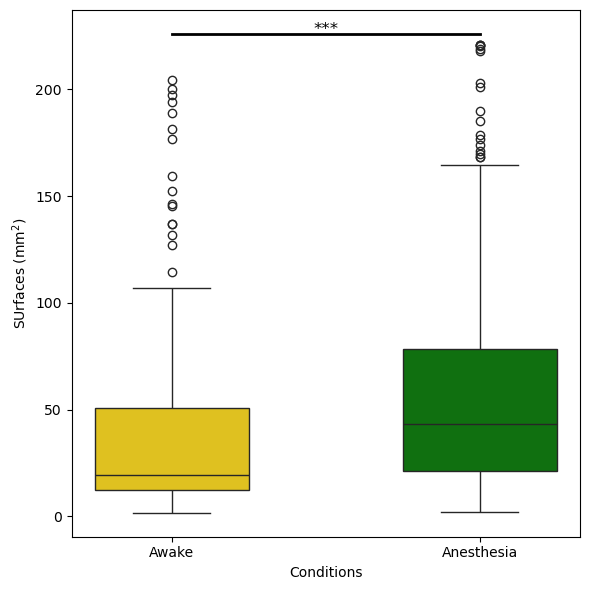

In [43]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Create boxplots with individual data points
sns.boxplot(data=[Aw_areas, An_areas], ax=ax, width=0.5, palette=['gold', 'green'])
#sns.stripplot(data=[Aw_areas, An_areas], ax=ax, color='black', alpha=0.8, marker='.', jitter=True)

# Calculate p-value (example using t-test, replace with your statistical test)
p_value = stat.mannwhitneyu(Aw_areas, An_areas)[1]

# Draw a line on top of the boxplots
line_y = np.max(np.append(Aw_areas,An_areas)) + 5  # Adjust the y position of the line

# Add significance stars
if p_value < 0.05:
    ax.plot([0, 1], [line_y, line_y], color='black', linewidth=2)
    if p_value < 0.001:
        ax.text(0.5, line_y + 0.1, "***", fontsize=12, ha='center')
    elif p_value<0.01:
        ax.text(0.5, line_y + 0.1, "**", fontsize=12, ha='center')
    else:
        ax.text(0.5, line_y + 0.1, "*", fontsize=12, ha='center')
# Customize plot
ax.set_xticklabels(['Awake', 'Anesthesia'])
ax.set_ylabel('SUrfaces (mm$^2$)')
ax.set_xlabel('Conditions')
#ax.set_title('Pattern surfaces')

plt.tight_layout()
#plt.savefig('Surface comparison')
plt.show()

In [44]:
np.nanstd(Aw_areas), np.nanstd(An_areas)

(46.92419196502327, 39.991392896276224)

In [45]:
stat.ttest_ind(An_areas, Aw_areas, equal_var=True)

TtestResult(statistic=3.4439052684554268, pvalue=0.0005921421964025153, df=1264.0)

In [46]:
stat.mannwhitneyu(An_areas, Aw_areas, alternative='greater')

MannwhitneyuResult(statistic=116916.0, pvalue=2.7082466185537184e-09)

In [47]:
stat.mannwhitneyu(An_areas, Aw_areas)

MannwhitneyuResult(statistic=116916.0, pvalue=5.416493237107437e-09)

In [48]:
stat.kruskal(An_areas, Aw_areas)

KruskalResult(statistic=34.03505848660593, pvalue=5.412795915570186e-09)

Conclusion: Waves are significantly larger under anesthesia than in awake state.

## Wave Speed

### Centroid speed

In [49]:
Center_speed=[]
for k in Data.keys():
    Center_speed.append(Data[k]['Center speed (m/s)'].loc[Data[k]['Translation']].values)

In [50]:
An_Sp_center_speed=Center_speed[2][~np.isnan(Center_speed[2])]
An_Ev_center_speed=np.concatenate(Center_speed[3:5])
An_Ev_center_speed=An_Ev_center_speed[~np.isnan(An_Ev_center_speed)]

In [51]:
len(An_Sp_center_speed), len(An_Ev_center_speed)

(108, 254)

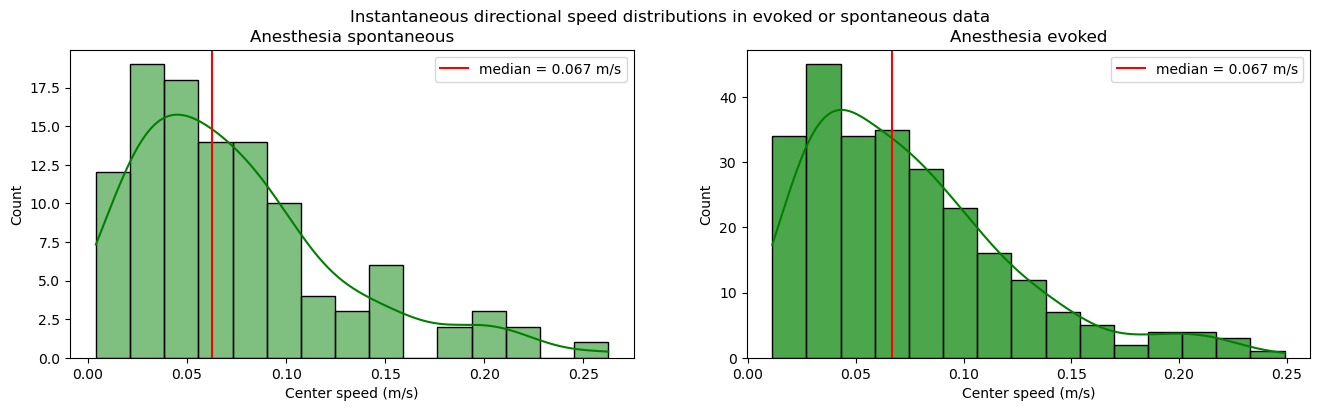

In [52]:
fig, axs = plt.subplots(1,2, figsize=(16,4))
fig.suptitle('Instantaneous directional speed distributions in evoked or spontaneous data')

sns.histplot(An_Sp_center_speed, bins=15, kde=True, ax=axs[0], color='green')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Center speed (m/s)')
axs[0].set_title('Anesthesia spontaneous')
axs[0].axvline(np.nanmedian(An_Sp_center_speed), color='r', label=f'median = {round(np.nanmedian(An_Ev_center_speed),3)} m/s')
#axs[0].vlines(np.nanmean(An_Sp_center_speed), 0, max(histo[0]), color='orange', label=f'mean = {round(np.nanmean(An_Sp_center_speed),3)} m/s', linestyle='--')
axs[0].legend()

sns.histplot(An_Ev_center_speed, bins=15, kde=True, ax=axs[1], color='green', alpha=0.7)
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Center speed (m/s)')
axs[1].set_title('Anesthesia evoked')
axs[1].axvline(np.nanmedian(An_Ev_center_speed), color='r', label=f'median = {round(np.nanmedian(An_Ev_center_speed),3)} m/s')
#axs[1].vlines(np.nanmean(An_Ev_center_speed), 0, max(histo[0]), color='orange', label=f'mean = {round(np.nanmean(An_Ev_center_speed),3)} m/s', linestyle='--')
axs[1].legend()

In [53]:
stat.mannwhitneyu(An_Sp_center_speed, An_Ev_center_speed)

MannwhitneyuResult(statistic=13144.0, pvalue=0.5304157229011068)

In [54]:
stat.kruskal(An_Sp_center_speed, An_Ev_center_speed)

KruskalResult(statistic=0.39428404782734106, pvalue=0.5300560764591498)

In [55]:
An_center_speed=np.concatenate([An_Sp_center_speed, An_Ev_center_speed])
print(len(An_center_speed))

362


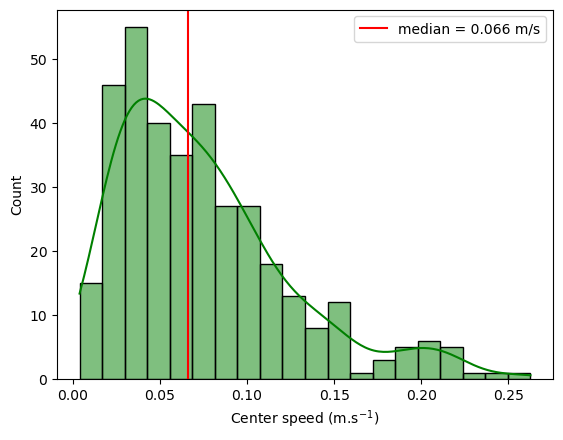

In [56]:
fig, ax=plt.subplots()
sns.histplot(An_center_speed, bins=20, kde=True, ax=ax, color='green')
ax.axvline(np.median(An_center_speed), color='r', label=f'median = {round(np.median(An_center_speed),3)} m/s')
ax.set_xlabel('Center speed (m.s$^{-1}$)')
ax.legend()
#fig.savefig('An center speed')

In [57]:
np.std(An_center_speed)

0.04939802697180499

In [89]:
mean=np.mean(An_center_speed)
mean

0.07496642895302463

In [83]:
SEM=np.std(An_center_speed)/(len(An_center_speed))**0.5

In [90]:
4739-164-140-140-116

4179

In [84]:
SEM

0.0025963026562048773

In [87]:
mean+SEM

0.07756273160922951

In [88]:
mean-SEM

0.07237012629681976

### Radial speed

In [58]:
Radial_speed=[]
for k in Data.keys():
    Radial_speed.append(Data[k]['Radial speed (m/s)'].loc[Data[k]['Expansion']].values)

In [59]:
Aw_radial_speed=np.concatenate(Radial_speed[0:2])
Aw_radial_speed=Aw_radial_speed[~np.isnan(Aw_radial_speed)]

An_radial_speed=np.concatenate(Radial_speed[2:5])
An_radial_speed=An_radial_speed[~np.isnan(An_radial_speed)]


In [60]:
len(An_radial_speed), len(Aw_radial_speed)

(347, 46)

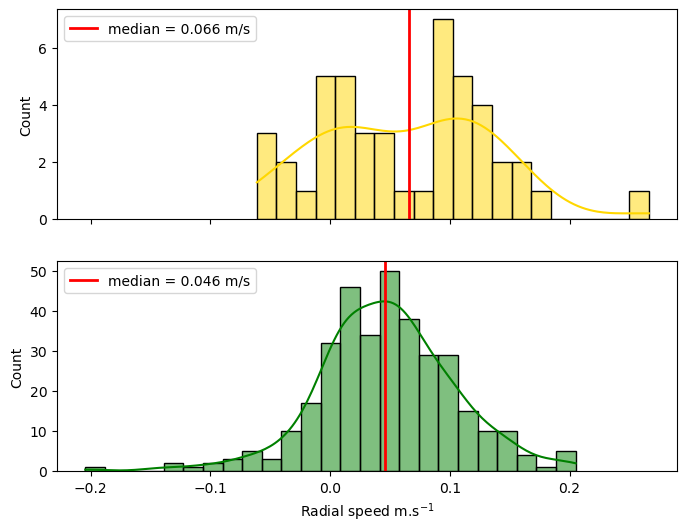

In [61]:
fig, axs = plt.subplots(2,1, figsize=(8,6), sharex=True)
#fig.suptitle('Instantaneous radial speed distributions in evoked or spontaneous data')

sns.histplot(Aw_radial_speed, bins=20, ax=axs[0],kde=True, color='gold')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Radial speed (m/s)')
#axs[0].set_title('Awake session')
axs[0].axvline(np.nanmedian(Aw_radial_speed), color='r', label=f'median = {np.round(np.median(Aw_radial_speed),4)} m/s', linewidth=2)
#axs[0].axvline(np.nanmean(Aw_radial_speed), color='orange', label=f'mean = {round(np.nanmean(Aw_radial_speed),3)} m/s', linestyle='--')
axs[0].legend(loc='upper left')

sns.histplot(An_radial_speed, bins=25, kde=True, color='green', ax=axs[1])
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Radial speed m.s$^{-1}$')
#axs[1].set_title('Anesthetised session')
axs[1].axvline(np.nanmedian(An_radial_speed), color='r', label=f'median = {round(np.nanmedian(An_radial_speed),3)} m/s', linewidth=2)
#axs[1].axvline(np.nanmean(An_radial_speed), color='orange', label=f'mean = {round(np.nanmean(An_radial_speed),3)} m/s', linestyle='--')
axs[1].legend(loc='upper left')
#fig.savefig('Radial speed comparison')

In [62]:
np.median(Aw_radial_speed)

0.06597936494582006

In [63]:
np.std(Aw_radial_speed), np.std(An_radial_speed)

(0.07090418653480841, 0.05688491313952832)

In [64]:
stat.mannwhitneyu(An_radial_speed, Aw_radial_speed, alternative='less')

MannwhitneyuResult(statistic=7014.0, pvalue=0.09092838851130464)

In [65]:
stat.ttest_ind(An_radial_speed, Aw_radial_speed, equal_var=True)

TtestResult(statistic=-1.8287442100574522, pvalue=0.06819952141738761, df=391.0)

## Wave trajectories

In [66]:
Trajectories=[]
for k in Data.keys():
    traject_cond=[]
    for i in range(Data[k]['MC #'].iloc[-1]+1):
        xc=Data[k]['x_centroid (px)'].loc[Data[k]['MC #']==i].values
        yc=Data[k]['y_centroid (px)'].loc[Data[k]['MC #']==i].values
        traject_cond.append(np.vstack((xc,yc)))
    Trajectories.append(traject_cond)

In [67]:
awake_line=np.array([[ 49, 409],[ 87, 131]])
awake_circle =[[219, 187], 199]
anesth_line=np.array([[251,   5],[ 90, 118]])
anesth_circle=[[145, 125], 140]

### Source Location

In [68]:
anesth_line

array([[251,   5],
       [ 90, 118]])

In [69]:
anesth_line.T

array([[251,  90],
       [  5, 118]])

In [70]:
awake_borderline = LineString(awake_line.T)
anesth_borderline = LineString(anesth_line.T)

In [71]:
Trajectories[3][20].T

array([[151.63348416,  42.21266968],
       [135.75      ,  51.59943182],
       [129.11222445,  68.48296593],
       [127.25323741,  75.0705036 ],
       [125.00174672,  92.81310044],
       [116.50822562, 102.39189189],
       [116.81879477, 109.25242309],
       [112.77529183, 120.65953307],
       [112.22551763, 137.93984331],
       [101.14661825, 120.62187926],
       [105.10058309, 111.86588921]])

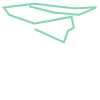

In [72]:
trject = LineString(np.fliplr(Trajectories[3][19].T))
trject

In [73]:
trject.crosses(anesth_borderline)

True

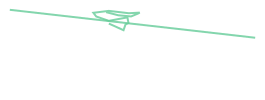

In [74]:
trject.union(anesth_borderline)

In [75]:
anesth_borderline.xy

(array('d', [251.0, 5.0]), array('d', [90.0, 118.0]))

In [76]:
Sources = []
for cond in Trajectories:
    x_source, y_source = [], []
    for coords in cond:
        x_source.append(coords[1][0])
        y_source.append(coords[0][0])
    Sources.append([x_source, y_source])

(0.0, 250.0, 250.0, 0.0)

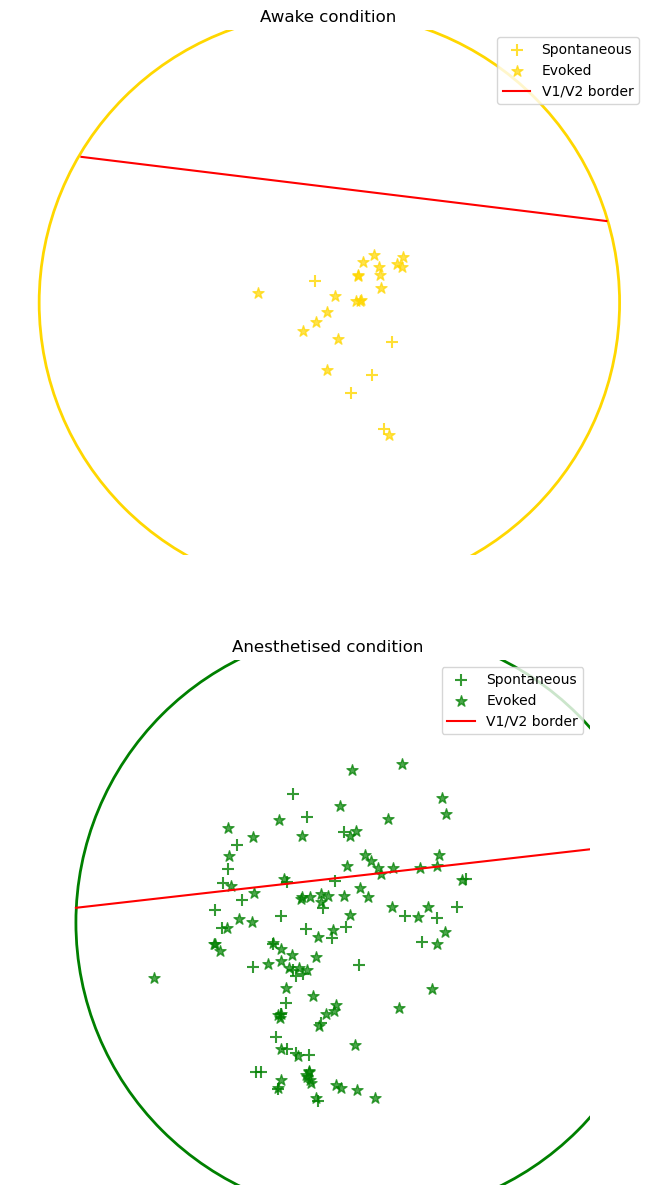

In [77]:
fig, ax = plt.subplots(2,1, figsize=(12,15))

ax[0].set_title('Awake condition')
ax[0].scatter(Sources[0][0], Sources[0][1],  color='gold', alpha=0.8, marker='+', s=70, label='Spontaneous')
ax[0].scatter(Sources[1][0], Sources[1][1],  color='gold', alpha=0.7, marker='*', s=70, label='Evoked')
ax[0].set_aspect('equal')
ax[0].add_patch(patch.Circle(awake_circle[0], awake_circle[1], color='gold',fill=False, linewidth=2))
ax[0].plot(awake_line[0],awake_line[1], label='V1/V2 border', color='r')
ax[0].set_xlim(0,436)
ax[0].set_ylim(0,360)
ax[0].invert_yaxis()
ax[0].legend(loc='upper right')
ax[0].axis('off')


ax[1].set_title('Anesthetised condition')
ax[1].scatter(Sources[2][0], Sources[2][1],  color='green', alpha=0.8, marker='+', s=70, label='Spontaneous')
ax[1].scatter(Sources[3][0], Sources[3][1],  color='green', alpha=0.7, marker='*', s=70, label='Evoked')
ax[1].scatter(Sources[4][0], Sources[4][1],  color='green', alpha=0.7, marker='*', s=70)
ax[1].set_aspect('equal')
ax[1].add_patch(patch.Circle(anesth_circle[0], anesth_circle[1], color='green',fill=False, linewidth=2))
ax[1].plot(anesth_line[0], anesth_line[1], label='V1/V2 border', color='r')
ax[1].set_xlim(0,250)
ax[1].set_ylim(0,250)
ax[1].invert_yaxis()
ax[1].legend(loc='upper right')
ax[1].axis('off')

In [78]:
#fig.savefig('Source location')

### Wave paths

(0.0, 250.0, 250.0, 0.0)

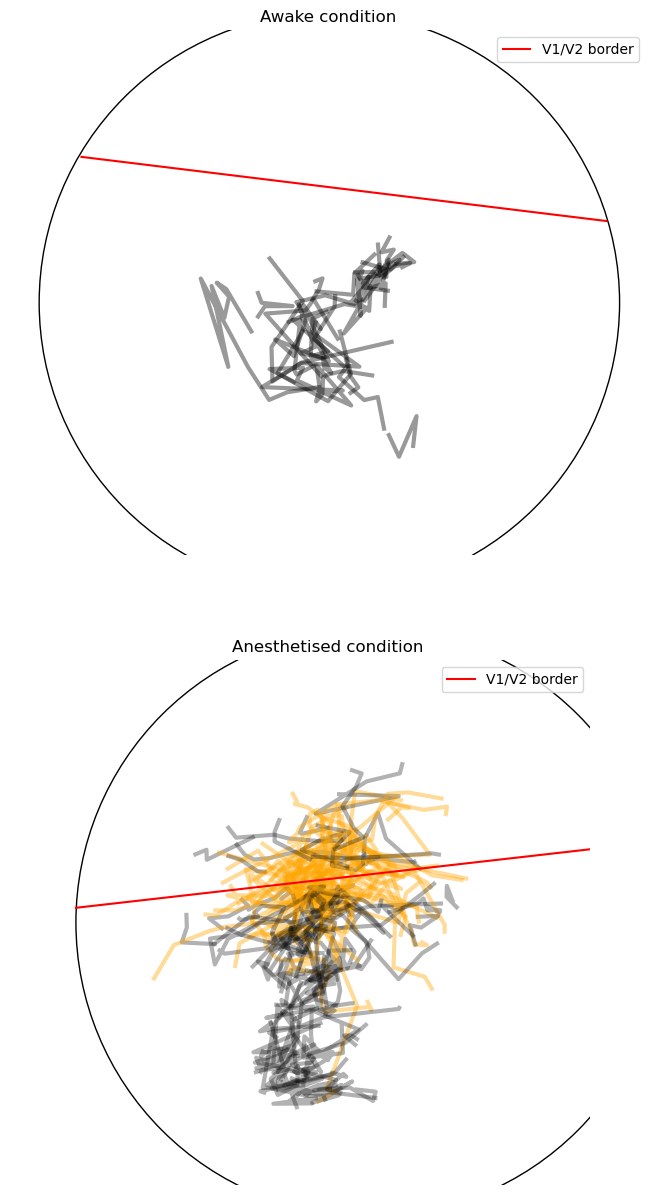

In [79]:
fig, ax = plt.subplots(2,1, figsize=(15,15))

ax[0].set_title('Awake condition')
for i in range(len(Trajectories[0])):
    ax[0].plot(Trajectories[0][i][1], Trajectories[0][i][0], linewidth=3, color='k', alpha=0.4)
for i in range(len(Trajectories[1])):
    ax[0].plot(Trajectories[1][i][1], Trajectories[1][i][0], linewidth=3, color='k', alpha=0.4)
ax[0].set_aspect('equal')
ax[0].add_patch(patch.Circle(awake_circle[0], awake_circle[1], color='k',fill=False))
ax[0].plot(awake_line[0],awake_line[1], label='V1/V2 border', color='r')
ax[0].set_xlim(0,436)
ax[0].set_ylim(0,360)
ax[0].invert_yaxis()
ax[0].legend(loc='upper right')
ax[0].axis('off')


ax[1].set_title('Anesthetised condition')

for i in range(len(Trajectories[2])):
    if  LineString(np.fliplr(Trajectories[2][i].T)).crosses(anesth_borderline):
        ax[1].plot(Trajectories[2][i][1], Trajectories[2][i][0], linewidth=3, color='orange', alpha=0.4)
    else:
        ax[1].plot(Trajectories[2][i][1], Trajectories[2][i][0], linewidth=3, color='k', alpha=0.3)

for i in range(len(Trajectories[3])):
    if  LineString(np.fliplr(Trajectories[3][i].T)).crosses(anesth_borderline):
        ax[1].plot(Trajectories[3][i][1], Trajectories[3][i][0], linewidth=3, color='orange', alpha=0.4)
    else:
        ax[1].plot(Trajectories[3][i][1], Trajectories[3][i][0], linewidth=3, color='k', alpha=0.3)

for i in range(len(Trajectories[4])):
    if  LineString(np.fliplr(Trajectories[4][i].T)).crosses(anesth_borderline):
        ax[1].plot(Trajectories[4][i][1], Trajectories[4][i][0], linewidth=3, color='orange', alpha=0.4)
    else:
        ax[1].plot(Trajectories[4][i][1], Trajectories[4][i][0], linewidth=3, color='k', alpha=0.3)
    
ax[1].set_aspect('equal')
ax[1].add_patch(patch.Circle(anesth_circle[0], anesth_circle[1], color='k',fill=False))
ax[1].plot(anesth_line[0], anesth_line[1], label='V1/V2 border', color='r')
ax[1].set_xlim(0,250)
ax[1].set_ylim(0,250)
ax[1].invert_yaxis()
ax[1].legend(loc='upper right')
ax[1].axis('off')

In [80]:
#fig.savefig('Trajectories')

(0.0, 250.0, 250.0, 0.0)

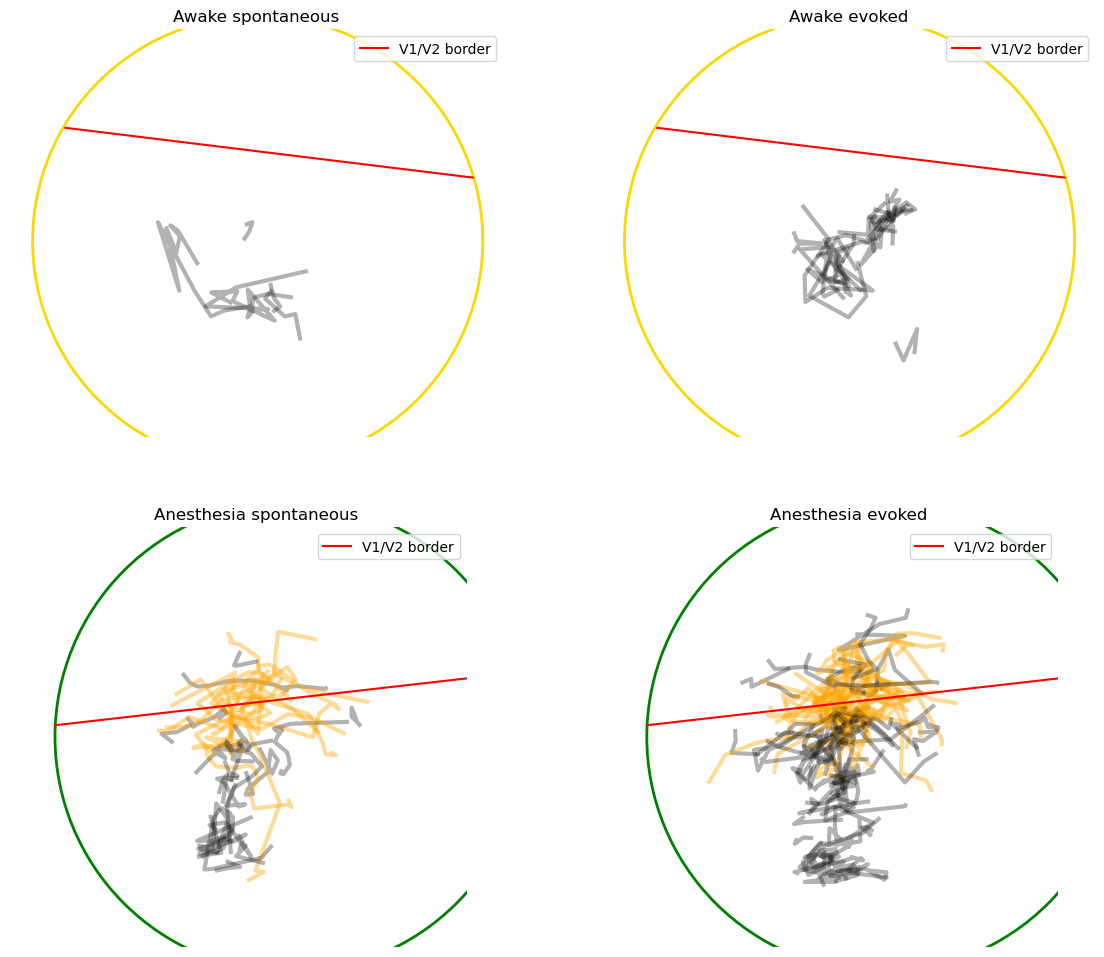

In [81]:
fig, ax = plt.subplots(2,2, figsize=(14,12))

ax[0,0].set_title('Awake spontaneous')
for i in range(len(Trajectories[0])):
    ax[0,0].plot(Trajectories[0][i][1], Trajectories[0][i][0], linewidth=3, color='k', alpha=0.3)
ax[0,0].set_aspect('equal')
ax[0,0].add_patch(patch.Circle(awake_circle[0], awake_circle[1], color='gold',fill=False, linewidth=2))
ax[0,0].plot(awake_line[0],awake_line[1], label='V1/V2 border', color='r')
ax[0,0].set_xlim(0,436)
ax[0,0].set_ylim(0,360)
ax[0,0].invert_yaxis()
ax[0,0].legend(loc='upper right')
ax[0,0].axis('off')

ax[0,1].set_title('Awake evoked')
for i in range(len(Trajectories[1])):
    ax[0,1].plot(Trajectories[1][i][1], Trajectories[1][i][0], linewidth=3, color='k', alpha=0.3)
ax[0,1].set_aspect('equal')
ax[0,1].add_patch(patch.Circle(awake_circle[0], awake_circle[1], color='gold',fill=False, linewidth=2))
ax[0,1].plot(awake_line[0],awake_line[1], label='V1/V2 border', color='r')
ax[0,1].set_xlim(0,436)
ax[0,1].set_ylim(0,360)
ax[0,1].invert_yaxis()
ax[0,1].legend(loc='upper right')
ax[0,1].axis('off')

ax[1,0].set_title('Anesthesia spontaneous')
for i in range(len(Trajectories[2])):
    if  LineString(np.fliplr(Trajectories[2][i].T)).crosses(anesth_borderline):
        ax[1,0].plot(Trajectories[2][i][1], Trajectories[2][i][0], linewidth=3, color='orange', alpha=0.4)
    else:
        ax[1,0].plot(Trajectories[2][i][1], Trajectories[2][i][0], linewidth=3, color='k', alpha=0.3)
ax[1,0].set_aspect('equal')
ax[1,0].add_patch(patch.Circle(anesth_circle[0], anesth_circle[1], color='green',fill=False, linewidth=2))
ax[1,0].plot(anesth_line[0], anesth_line[1], label='V1/V2 border', color='r')
ax[1,0].set_xlim(0,250)
ax[1,0].set_ylim(0,250)
ax[1,0].invert_yaxis()
ax[1,0].legend(loc='upper right')
ax[1,0].axis('off')

ax[1,1].set_title('Anesthesia evoked')
for i in range(len(Trajectories[3])):
    if  LineString(np.fliplr(Trajectories[3][i].T)).crosses(anesth_borderline):
        ax[1,1].plot(Trajectories[3][i][1], Trajectories[3][i][0], linewidth=3, color='orange', alpha=0.4)
    else:
        ax[1,1].plot(Trajectories[3][i][1], Trajectories[3][i][0], linewidth=3, color='k', alpha=0.3)

for i in range(len(Trajectories[4])):
    if  LineString(np.fliplr(Trajectories[4][i].T)).crosses(anesth_borderline):
        ax[1,1].plot(Trajectories[4][i][1], Trajectories[4][i][0], linewidth=3, color='orange', alpha=0.4)
    else:
        ax[1,1].plot(Trajectories[4][i][1], Trajectories[4][i][0], linewidth=3, color='k', alpha=0.3)

ax[1,1].set_aspect('equal')
ax[1,1].add_patch(patch.Circle(anesth_circle[0], anesth_circle[1], color='green',fill=False, linewidth=2))
ax[1,1].plot(anesth_line[0], anesth_line[1], label='V1/V2 border', color='r')
ax[1,1].set_xlim(0,250)
ax[1,1].set_ylim(0,250)
ax[1,1].invert_yaxis()
ax[1,1].legend(loc='upper right')
ax[1,1].axis('off')

In [82]:
#fig.savefig('Trajectories')